## Notes 

Some ideas taken from [here](http://people.virginia.edu/~lz2n/mse6020/notes/D-partial-fcc.pdf) and from [here](http://www.slideshare.net/omaratefradwan/mse501-ch5-radwan).

Burgers vector of the lowest energy dislocation is 
$$
    b = \frac{a}{2} \langle 110 \rangle \qquad \Rightarrow\qquad  |b| = \frac{a}{\sqrt{2}}
$$
The next best option is 
$$
    b' = a \langle 001 \rangle \qquad \Rightarrow \qquad |b'| = a 
$$
(the latter is rarely observed!) 

The slip-plane for $b'$ dislocations are $\{111\}$ close packed planes stacked in ABCABC arrangement. 

But of course we can equivalently take $b \propto 101$ or $b \propto 011$. 



In [3]:
using PyPlot
using JuLIP
using JuLIP.ASE, JuLIP.Potentials, JuLIP.Constraints 


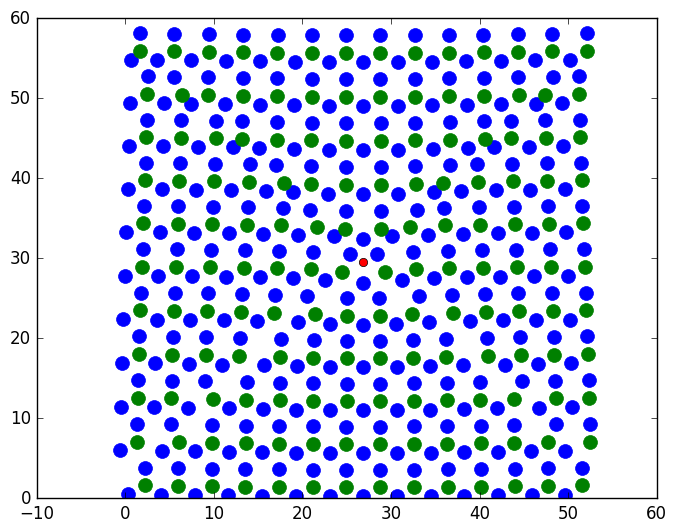

[16.57 6.39 6.39 0.0 0.0 0.0; 6.39 16.57 6.39 0.0 0.0 0.0; 6.39 6.39 16.57 0.0 0.0 0.0; 0.0 0.0 0.0 7.96 0.0 0.0; 0.0 0.0 0.0 0.0 7.96 0.0; 0.0 0.0 0.0 0.0 0.0 7.96]Here[17.45 5.80333 6.09667 0.414836 3.33067e-16 0.0; 5.80333 17.7433 5.80333 -2.22045e-16 0.0 -2.22045e-16; 6.09667 5.80333 17.45 -0.414836 0.0 -2.22045e-16; 0.414836 -2.22045e-16 -0.414836 5.38333 1.62483 -1.14893; 1.91488 -0.765951 -1.14893 1.08322 5.67667 -0.414836; -0.541609 2.16644 -1.62483 0.382976 -0.414836 5.38333](λ,ϕ) = (1.0,1.0474313292245534)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0e41a95e50>

In [58]:
# isotropic elasticity solution for an FCC edge dislocation 
reload("MaterialsScienceTools")
calc = lennardjones(r0=rnn("Al"))
at, xcore = MaterialsScienceTools.Dislocations_Silicon_hard.fcc_edge_geom("Si", 5.1, truncate=false, cle=:anisotropic, calc = calc)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=20)
plot(x[I1], y[I1], "g.", markersize=20)
plot([xcore[1]], [xcore[2]], "ro")

In [27]:
# next we need to check the implementation of the elastic constants 
reload("MaterialsScienceTools")
El = MaterialsScienceTools.Elasticity
Dis = MaterialsScienceTools.Dislocations
;

In [38]:
E = eye(3)
X = [1 2 3; 4 5 6; 0 0 0]
[:,1]

3-element Array{Int64,1}:
 1
 4
 0

In [43]:
# first try the standard cubic cell : 
# this looks like a valid cubic symmetry tensor ✓
atu = set_pbc!(bulk("Al", cubic=true) * 2, true)
set_calculator!(atu, lennardjones(r0=rnn("Al")))
set_constraint!(atu, VariableCell(atu))
# JuLIP.Solve.minimise!(atu);
Cvoigt = round(El.voigt_moduli(atu), 3)
Cvoigt

6×6 Array{Float64,2}:
  6.479   3.227   3.227  -0.0     0.0    -0.0  
  3.227   6.479   3.227  -0.0    -0.0     0.0  
  3.227   3.227   6.479  -0.0     0.0    -0.0  
  0.0    -0.0    -0.0     4.212  -0.0    -0.0  
  0.0     0.0     0.0    -0.0     4.212   0.0  
 -0.0    -0.0    -0.0    -0.0     0.0     4.212

In [28]:
# check how far we are from anisotropy: pretty far actually 
println((Cvoigt[1,1] - Cvoigt[1,2]) / 2)
println("for isotropy, this number should match Cvoigt[6,6] = ", Cvoigt[6,6])

1.6260000000000001
for isotropy, this number should match Cvoigt[6,6] = 4.212


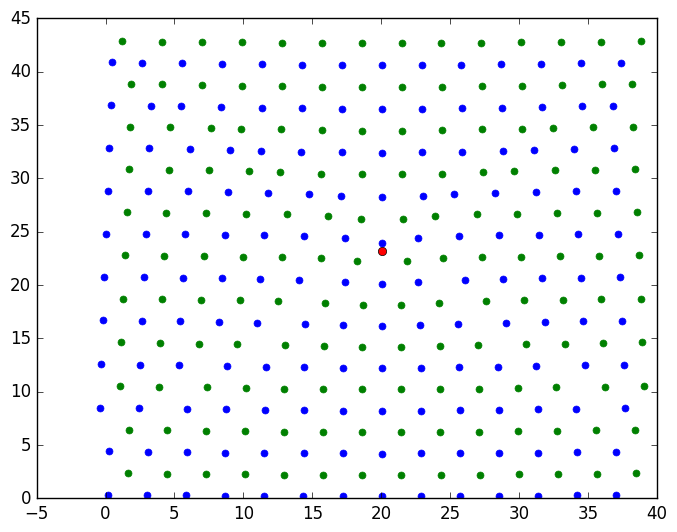

[9.06513 3.22679 0.640383 9.04038e-12 2.31394e-11 5.09541e-12; 3.22679 6.47872 3.22679 1.95123e-11 1.85895e-11 -2.50376e-11; 0.640383 3.22679 9.06513 4.03481e-12 1.6125e-11 9.85372e-12; -1.97975e-13 -1.15648e-11 -8.70597e-12 4.21237 3.65517e-11 5.23295e-12; 3.23239e-11 1.7435e-11 1.84599e-11 2.95573e-11 1.62596 2.21326e-11; -1.33424e-11 -6.62897e-11 -1.42423e-11 2.36874e-11 1.03838e-11 4.21237](λ,ϕ) = (1.0876050097921104,0.9521339217080068)


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f4bfc446c50>

In [54]:
reload("MaterialsScienceTools")
Dis = MaterialsScienceTools.Dislocations
calc = lennardjones(r0=rnn("Al"))
at, xcore = Dis.fcc_edge_geom("Al", 5.1, truncate=false, cle=:anisotropic, calc=calc, TOL=1e-4)
X = positions(at) |> mat
x, y, z = X[1,:], X[2,:], X[3,:] 
I0 = find(X[3,:] .== 0)
I1 = find(X[3,:] .> 0)
plot(x[I0], y[I0], "b.", markersize=10)
plot(x[I1], y[I1], "g.", markersize=10)
plot([xcore[1]], [xcore[2]], "ro")

In [8]:
reload("MaterialsScienceTools")
Cv = copy(Cvoigt)
Cv[2,2] = Cv[3,3] = Cv[1,1]
Cv[1,3] = Cv[2,3] = Cv[1,2]
Cv[4,4] = Cv[5,5] = Cv[6,6] = (Cv[1,1] - Cv[1,2])/2

1.6260000000000001

In [9]:
MaterialsScienceTools.Dislocations.u_edge([], [], 1.0, Cv)

10.82(λ,ϕ) = (1.0,1.1890457085836792)


LoadError: LoadError: MethodError: no method matching atan(::Array{Any,1})
Closest candidates are:
  atan(!Matched::BigFloat) at mpfr.jl:610
  atan(!Matched::Complex{Float16}) at math.jl:480
  atan(!Matched::Float16) at math.jl:479
  ...
while loading In[9], in expression starting on line 1

In [67]:
pi/2

1.5707963267948966